In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
celeba = pd.read_csv('celeba-dataset/list_attr_celeba.csv')

In [4]:
#alterando o índice
celeba['image_id'] = celeba['image_id'].apply(lambda x: x.replace('.jpg', ''))
celeba.set_index('image_id', inplace=True)

In [5]:
celeba.head(10)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
000006,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
000007,1,-1,1,1,-1,-1,1,1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
000008,1,1,-1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
000009,-1,1,1,-1,-1,1,1,-1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1


In [6]:
celeba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001 to 202599
Data columns (total 40 columns):
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non-null int64
High_Cheekbones        202599 non-

In [7]:
#as colunas foram salvas numa lista para uso futuro
attributes = list(celeba.columns)
celeba.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

# Exploratória

## Checando o equilíbrio de cada fator no dataset

In [8]:
equilibrium = []
for att in attributes:
    equilibrium.append([att, max(list(round(celeba[att].value_counts(normalize=True), 2)))])

In [9]:
sorted(equilibrium, key=lambda minilist: minilist[1], reverse=True)

[['Bald', 0.98],
 ['Gray_Hair', 0.96],
 ['Mustache', 0.96],
 ['Pale_Skin', 0.96],
 ['Blurry', 0.95],
 ['Double_Chin', 0.95],
 ['Wearing_Hat', 0.95],
 ['Chubby', 0.94],
 ['Goatee', 0.94],
 ['Sideburns', 0.94],
 ['Eyeglasses', 0.93],
 ['Rosy_Cheeks', 0.93],
 ['Wearing_Necktie', 0.93],
 ['Receding_Hairline', 0.92],
 ['5_o_Clock_Shadow', 0.89],
 ['Narrow_Eyes', 0.88],
 ['Wearing_Necklace', 0.88],
 ['Bushy_Eyebrows', 0.86],
 ['Bangs', 0.85],
 ['Blond_Hair', 0.85],
 ['No_Beard', 0.83],
 ['Wearing_Earrings', 0.81],
 ['Bags_Under_Eyes', 0.8],
 ['Brown_Hair', 0.79],
 ['Straight_Hair', 0.79],
 ['Big_Nose', 0.77],
 ['Young', 0.77],
 ['Big_Lips', 0.76],
 ['Black_Hair', 0.76],
 ['Arched_Eyebrows', 0.73],
 ['Oval_Face', 0.72],
 ['Pointy_Nose', 0.72],
 ['Wavy_Hair', 0.68],
 ['Heavy_Makeup', 0.61],
 ['Male', 0.58],
 ['High_Cheekbones', 0.54],
 ['Wearing_Lipstick', 0.53],
 ['Mouth_Slightly_Open', 0.52],
 ['Smiling', 0.52],
 ['Attractive', 0.51]]

## Checando Proporções e Correlações Específicas

In [10]:
palette = sns.diverging_palette(255, 10, sep=245, n=2)

## Gênero

In [11]:
round(celeba['Male'].replace([1, -1], ['Male', 'Female']).value_counts(normalize=True), 2)

Female    0.58
Male      0.42
Name: Male, dtype: float64

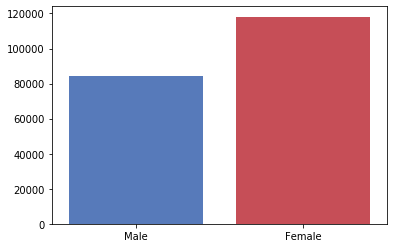

In [12]:
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Male', data=celeba.replace([1, -1], ['Male', 'Female']), order=['Male', 'Female'], palette=palette)
ax.set_ylabel('')    
ax.set_xlabel('');

Checando a correlação de gênero com alguns atributos que podem ser socialmente controversos.

In [13]:
round(celeba['Male'].corr(celeba['Wearing_Lipstick']), 2)

-0.79

In [14]:
round(celeba['Male'].corr(celeba['Heavy_Makeup']), 2)

-0.67

In [15]:
round(celeba['Male'].corr(celeba['Mustache']), 2)

0.25

In [16]:
round(celeba['Male'].corr(celeba['Goatee']), 2)

0.31

In [17]:
round(celeba['Male'].corr(celeba['Sideburns']), 2)

0.29

In [18]:
round(celeba['Male'].corr(celeba['Wearing_Earrings']), 2)

-0.37

In [19]:
round(celeba['Male'].corr(celeba['Wearing_Necklace']), 2)

-0.27

In [20]:
round(celeba['Male'].corr(celeba['Wearing_Necktie']), 2)

0.33

In [21]:
round(celeba['Male'].corr(celeba['Wearing_Hat']), 2)

0.13

É perceptível que uso maquiagem/batom, que é socialmente considerado um atributo feminino, é altamente atrelado a gênero em uma correlação negativa. Ou seja: se você é mulher as chances de usar maquiagem/batom são altas (mais abaixo vamos perceber que essas duas características estão bastante correlacionadas).
Da mesma forma o oposto se aplica, mas de forma menos intensa: o uso de bigode e barba, atributos socialmente masculinos, é bastante atrelado a gênero com uma correlação positiva. Provavelmente porque é mais raro uma mulher possuir pelos faciais - e, entre homens, não é uma exigência social.

Para acessórios a correlação mantém um nível mais baixo mas ainda assim conforme o socialmente esperado: acessórios como brincos e cordões são mais presentes em mulheres ao contrário de gravatas e chapéus.

## Idade

In [22]:
round(celeba['Young'].replace([1, -1], ['Young', 'Old']).value_counts(normalize=True), 2)

Young    0.77
Old      0.23
Name: Young, dtype: float64

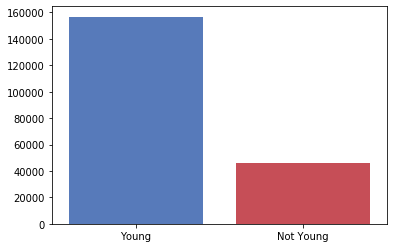

In [23]:
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Young', data=celeba.replace([1, -1], ['Young', 'Not Young']), order=['Young', 'Not Young'], palette=palette)
ax.set_ylabel('')    
ax.set_xlabel('');

Checando a correlação de idade com atributos esperados e/ou socialmente controversos.

In [24]:
round(celeba['Young'].corr(celeba['Gray_Hair']), 2)

-0.36

In [25]:
round(celeba['Young'].corr(celeba['Bald']), 2)

-0.2

In [26]:
round(celeba['Young'].corr(celeba['Wearing_Lipstick']), 2)

0.25

In [27]:
round(celeba['Young'].corr(celeba['Heavy_Makeup']), 2)

0.24

In [28]:
round(celeba['Young'].corr(celeba['Mustache']), 2)

-0.14

In [29]:
round(celeba['Young'].corr(celeba['Goatee']), 2)

-0.11

In [30]:
round(celeba['Young'].corr(celeba['Sideburns']), 2)

-0.09

In [31]:
round(celeba['Young'].corr(celeba['Wearing_Earrings']), 2)

0.03

In [32]:
round(celeba['Young'].corr(celeba['Wearing_Necklace']), 2)

0.01

In [33]:
round(celeba['Young'].corr(celeba['Wearing_Necktie']), 2)

-0.25

In [34]:
round(celeba['Young'].corr(celeba['Wearing_Hat']), 2)

-0.04

### Fazendo a mesma análise de gênero porém aplicada apenas a pessoas não jovens

Primeiro, uma análise de gênero de acordo com faixa etária.

In [35]:
round(celeba['Male'][celeba['Young'] == 1].replace([1, -1], ['Male', 'Female']).value_counts(normalize=True), 2)

Female    0.66
Male      0.34
Name: Male, dtype: float64

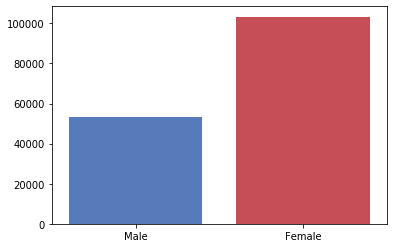

In [36]:
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Male', data=celeba[celeba['Young'] == 1].replace([1, -1], ['Male', 'Female']), order=['Male', 'Female'], palette=palette)
ax.set_ylabel('')    
ax.set_xlabel('');

In [37]:
round(celeba['Male'][celeba['Young'] == -1].replace([1, -1], ['Male', 'Female']).value_counts(normalize=True), 2)

Male      0.68
Female    0.32
Name: Male, dtype: float64

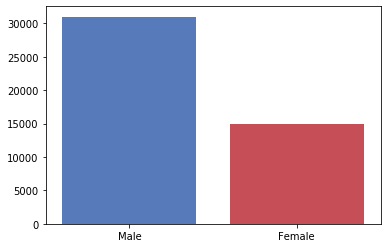

In [38]:
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Male', data=celeba[celeba['Young'] == -1].replace([1, -1], ['Male', 'Female']), order=['Male', 'Female'], palette=palette)
ax.set_ylabel('')    
ax.set_xlabel('');

In [39]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Gray_Hair']), 2)

0.19

In [40]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Bald']), 2)

0.2

In [41]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Wearing_Lipstick']), 2)

-0.81

In [42]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Heavy_Makeup']), 2)

-0.65

In [43]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Mustache']), 2)

0.22

In [44]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Goatee']), 2)

0.24

In [45]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Sideburns']), 2)

0.22

In [46]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Wearing_Earrings']), 2)

-0.61

In [47]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Wearing_Necklace']), 2)

-0.46

In [48]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Wearing_Necktie']), 2)

0.34

In [49]:
round(celeba['Male'][celeba['Young'] == -1].corr(celeba['Wearing_Hat']), 2)

0.12

Aqui é possível observar que indivíduos mais velhos têm cabelo branco ou são carecas com mais frequência do que indivíduos jovens, mesmo que não seja unanimidade.

Também é possível fazer uma análise do uso de maquiagens, pelos faciais e acessórios:
Atributos socialmente considerados femininos (maquiagem e jóias) são mais presentes em indivíduos jovens enquanto atributos socialmente considerados masculinos (cabelo branco, careca, pelos faciais, gravatas e chapéus) são mais presentes em indivíduos mais velhos, mesmo que em escala menor, provavelmente por existir uma quantidade maior de mulheres no grupo de jovens.

Outro fato interessante é que entre as indivíduos mais velhos há uma quantidade substancial a mais de homens - o oposto para pessoas jovens.

Ao considerarmos apenas as pessoas mais velhas, fazendo distinção por gênero, os resultados são bastantes semelhantes aos que obtivemos anteriormente quando considerávamos todos os indivíduos: o uso de maquiagem, pelos faciais, gravatas e chapéus não muda muito quando fazemos uma seleção apenas de gênero.
No entanto o uso de jóias tem um grande salto para mulheres idosas: a quantidade é consideravelmente maior.
- Hipótese: indivíduos jovens não compram tantas jóias
- Hipótese: indivíduos mais velhos consideram jóias um atributo que agrega valor atrativo

## Atributos de Maquiagem
### E a correlação direta entre eles

In [50]:
round(celeba['Heavy_Makeup'].replace([1, -1], ['Heavy Makeup', 'No Heavy Makeup']).value_counts(normalize=True), 2)

No Heavy Makeup    0.61
Heavy Makeup       0.39
Name: Heavy_Makeup, dtype: float64

In [51]:
round(celeba['Wearing_Lipstick'].replace([1, -1], ['Wearing Lipstick', 'Not Wearing Lipstick']).value_counts(normalize=True), 2)

Not Wearing Lipstick    0.53
Wearing Lipstick        0.47
Name: Wearing_Lipstick, dtype: float64

In [52]:
round(celeba['Heavy_Makeup'].corr(celeba['Wearing_Lipstick']), 2)

0.8

A correlação aqui é nítida: o uso de maquiagem pesada é extremamente correlacionado ao uso de batom. Dedutível, já que batom é um dos principais componentes em maquiagem.

## Atributos de Pelos Faciais
### E a correlação direta entre eles

In [53]:
round(celeba['Mustache'].replace([1, -1], ['Mustache', 'No Mustache']).value_counts(normalize=True), 2)

No Mustache    0.96
Mustache       0.04
Name: Mustache, dtype: float64

In [54]:
round(celeba['Goatee'].replace([1, -1], ['Goatee', 'No Goatee']).value_counts(normalize=True), 2)

No Goatee    0.94
Goatee       0.06
Name: Goatee, dtype: float64

In [55]:
round(celeba['Sideburns'].replace([1, -1], ['Sideburns', 'No Sideburns']).value_counts(normalize=True), 2)

No Sideburns    0.94
Sideburns       0.06
Name: Sideburns, dtype: float64

In [56]:
round(celeba['Mustache'].corr(celeba['Goatee']), 2)

0.45

In [57]:
round(celeba['Mustache'].corr(celeba['Sideburns']), 2)

0.34

In [58]:
round(celeba['Goatee'].corr(celeba['Sideburns']), 2)

0.51

Nota-se que não ter pêlos faciais (seja apenas bigode, cavanhaque ou costeleta) é uma preferência geral independente de gênero. Também é possível observar que o uso de um dos atributos tem bastante correlação com o outro, ou seja, é mais comum o uso de "barba completa" do que de suas partes fatiadas.

## Uso de Acessórios

In [59]:
round(celeba['Wearing_Earrings'].replace([1, -1], ['Wearing Earrings', 'Not Wearing Earrings']).value_counts(normalize=True), 2)

Not Wearing Earrings    0.81
Wearing Earrings        0.19
Name: Wearing_Earrings, dtype: float64

In [60]:
round(celeba['Wearing_Necklace'].replace([1, -1], ['Wearing Necklace', 'Not Wearing Necklace']).value_counts(normalize=True), 2)

Not Wearing Necklace    0.88
Wearing Necklace        0.12
Name: Wearing_Necklace, dtype: float64

In [61]:
round(celeba['Wearing_Necktie'].replace([1, -1], ['Wearing Necktie', 'Not Wearing Necktie']).value_counts(normalize=True), 2)

Not Wearing Necktie    0.93
Wearing Necktie        0.07
Name: Wearing_Necktie, dtype: float64

In [62]:
round(celeba['Wearing_Hat'].replace([1, -1], ['Wearing Hat', 'Not Wearing Hat']).value_counts(normalize=True), 2)

Not Wearing Hat    0.95
Wearing Hat        0.05
Name: Wearing_Hat, dtype: float64

Acessórios num geral estão presentes em uma minoria dos indivíduos.

## Cor do cabelo

Desconsiderando indivíduos carecas, uma análise de quais cores de cabelo são mais dominantes.

In [63]:
black = round(celeba[celeba['Bald'] == -1]['Black_Hair'].replace([1, -1], ['Black Hair', 'Other Color']).value_counts(normalize=True), 2)[1]
round(celeba[celeba['Bald'] == -1]['Black_Hair'].replace([1, -1], ['Black Hair', 'Other Color']).value_counts(normalize=True), 2)

Other Color    0.76
Black Hair     0.24
Name: Black_Hair, dtype: float64

In [64]:
blond = round(celeba[celeba['Bald'] == -1]['Blond_Hair'].replace([1, -1], ['Blond Hair', 'Other Color']).value_counts(normalize=True), 2)[1]
round(celeba[celeba['Bald'] == -1]['Blond_Hair'].replace([1, -1], ['Blond Hair', 'Other Color']).value_counts(normalize=True), 2)

Other Color    0.85
Blond Hair     0.15
Name: Blond_Hair, dtype: float64

In [65]:
brown = round(celeba[celeba['Bald'] == -1]['Brown_Hair'].replace([1, -1], ['Brown Hair', 'Other Color']).value_counts(normalize=True), 2)[1]
round(celeba[celeba['Bald'] == -1]['Brown_Hair'].replace([1, -1], ['Brown Hair', 'Other Color']).value_counts(normalize=True), 2)

Other Color    0.79
Brown Hair     0.21
Name: Brown_Hair, dtype: float64

In [66]:
gray = round(celeba[celeba['Bald'] == -1]['Gray_Hair'].replace([1, -1], ['Gray Hair', 'Other Color']).value_counts(normalize=True), 2)[1]
round(celeba[celeba['Bald'] == -1]['Gray_Hair'].replace([1, -1], ['Gray Hair', 'Other Color']).value_counts(normalize=True), 2)

Other Color    0.96
Gray Hair      0.04
Name: Gray_Hair, dtype: float64

In [67]:
black+blond+brown+gray

0.64

In [68]:
mask1 = celeba['Black_Hair'] == -1
mask2 = celeba['Blond_Hair'] == -1
mask3 = celeba['Brown_Hair'] == -1
mask4 = celeba['Gray_Hair'] == -1
mask5 = celeba['Bald'] == -1
other = round(celeba[mask1&mask2&mask3&mask4&mask5].count()/celeba.count(), 2)[0]
round(celeba[mask1&mask2&mask3&mask4&mask5].count()/celeba.count(), 2)[0]

0.36

In [69]:
black+blond+brown+gray+other

1.0

Entre pessoas não carecas a cor mais comum de cabelo é preta, seguida de castanha, loira e por fim cinza.

No entanto ao somarmos o percentual de ocorrência dessas cores não obtemos 100%.
- Hipótese: existem cabelos em outras cores nos indivíduos (ruivo, cores não genéticas)
- Hipótese: tonalidades que estão entre duas das catalogadas e, por isso, não foram classificadas como nenhuma delas

## Sorriso

In [70]:
round(celeba['Smiling'].replace([1, -1], ['Smiling', 'Not Smiling']).value_counts(normalize=True), 2)

Not Smiling    0.52
Smiling        0.48
Name: Smiling, dtype: float64

## Atratividade

In [71]:
round(celeba['Attractive'].replace([1, -1], ['Attractive', 'Not Attractive']).value_counts(normalize=True), 2)

Attractive        0.51
Not Attractive    0.49
Name: Attractive, dtype: float64

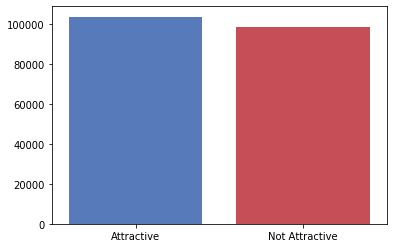

In [72]:
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Attractive', data=celeba.replace([1, -1], ['Attractive', 'Not Attractive']), order=['Attractive', 'Not Attractive'], palette=palette)
ax.set_ylabel('')    
ax.set_xlabel('');

Por ser a variável mais bem equilibrada de todo o dataset e também supostamente a mais subjetiva, é um bom foco para a análise.

# Checando correlações visualmente

## Máscara para facilitar o gráfico

In [73]:
plotceleba = celeba.corr()
mask = np.zeros_like(plotceleba, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Gerando a paleta a ser usada

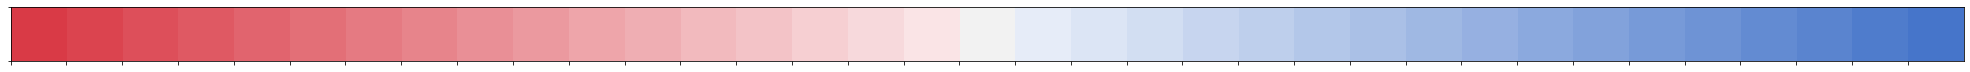

In [74]:
#sep e n são múltiplos complementares do intervalo 10-255 para a graduação de cores ser mais coerente
palette = sns.diverging_palette(10, 255, sep=7, n=35)
sns.palplot(palette)

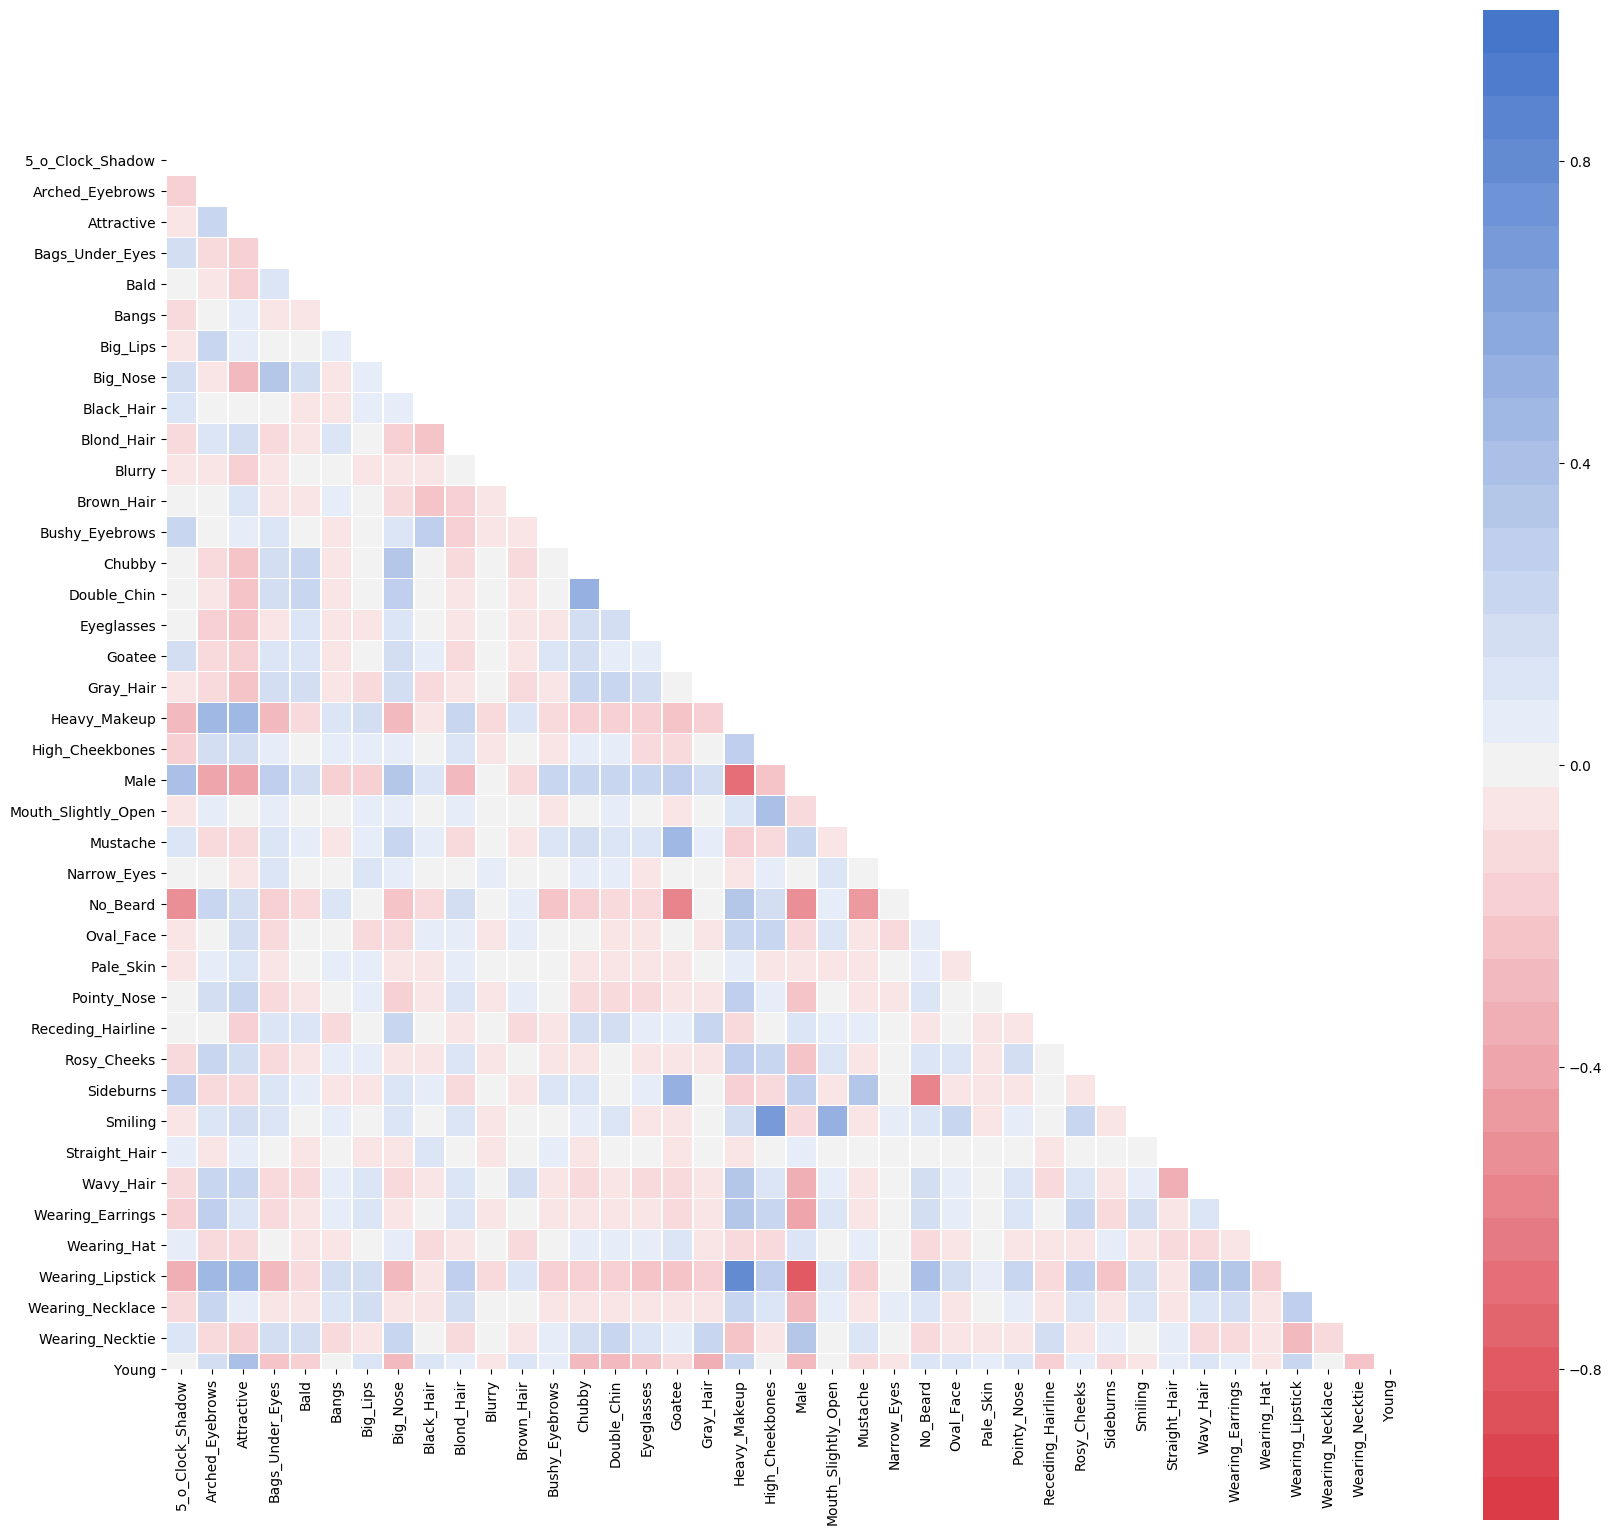

In [75]:
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(celeba.corr(), vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, mask=mask);

É um belo gráfico para observarmos de forma geral como as correlações acontecem, mas não é fácil focar especificamente nas mais fortes.

# Focando em correlações mais fortes

## Gerando uma paleta mais focada

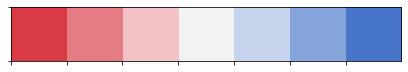

In [76]:
#sep e n são múltiplos complementares do intervalo 10-255 para a graduação de cores ser mais coerente
palette = sns.diverging_palette(10, 255, sep=35, n=7)
sns.palplot(palette)

## Visualizando correlações acima de 50%

In [77]:
plotceleba = celeba.corr()
plotceleba[np.abs(plotceleba) < 0.5] = 0

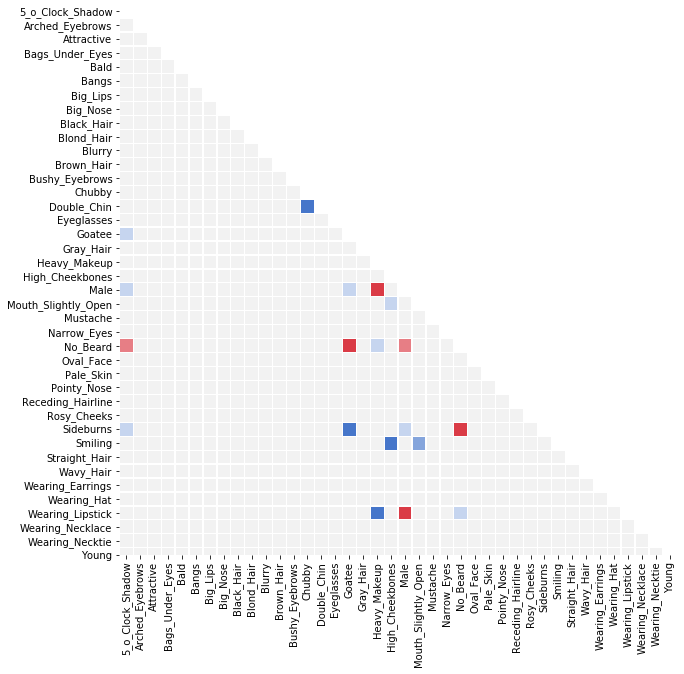

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(plotceleba.corr(), vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, mask=mask, cbar=False);

Agora fica mais fácil visualizar quais variáveis estão razoavelmente correlacionadas umas com as outras. Já analisamos algumas delas anteriormente:
- Gênero e uso de maquiagem
- Uso de batom e uso de maquiagem
- Uso de cavanhaque e uso de costeleta

Mas também podemos observar algumas novas, menos dedutíveis a princípio:
- Maçã do rosto e boca levemente aberta
- Maçã do rosto e sorriso

## Visualizando correlações acima de 75%

In [79]:
plotceleba = celeba.corr()
plotceleba[np.abs(plotceleba) < 0.75] = 0

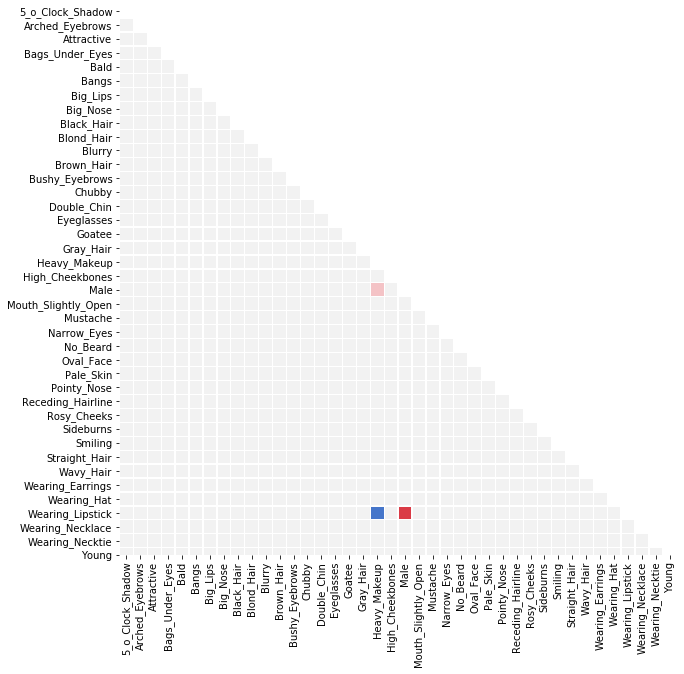

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(plotceleba.corr(), vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, mask=mask, cbar=False);

Aqui fica explícito quais variáveis são altamente correlacionadas. Especificamente:
- Gênero e uso de maquiagem
- Gênero e uso de batom
- Uso de batom e uso de maquiagem

Bastante autoexplicativo: como o uso de batom e o uso de maquiagem têm a maior correlação de todas as nossas variáveis é dedutível que se gênero tem alta correlação com uma também terá com outra.

# Checando Correlações de Atratividade

## Correlação Absoluta

In [81]:
attabscorr = celeba.corr()[['Attractive']].apply(lambda ratio: abs(round(ratio, 2))).sort_values(by='Attractive', ascending=False)
attabscorr

,Attractive
Attractive,1.00
Heavy_Makeup,0.48
Wearing_Lipstick,0.48
Male,0.39
Young,0.39
Big_Nose,0.28
Arched_Eyebrows,0.25
Chubby,0.24
Pointy_Nose,0.23
Eyeglasses,0.22


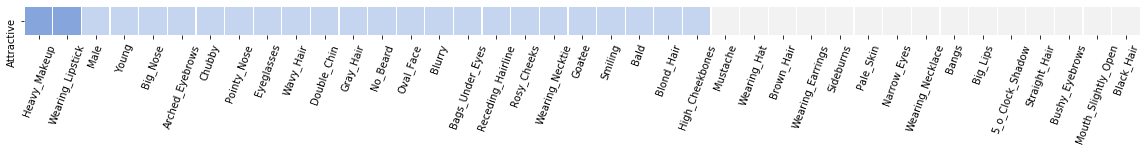

In [82]:
plt.figure(figsize=(20, 10))
sns.heatmap(attabscorr.transpose().iloc[:, 1:], vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, cbar=False)
plt.xticks(rotation=70);

Tomar inicialmente as correlações absolutas torna a análise mais fácil: é possível observar logo no começo da tabela ou do gráfico quais são os atributos que mais contribuem para que uma foto seja considerada atrativa e filtrá-las.

## Correlação Comum

In [83]:
attcorr = celeba.corr()[['Attractive']].sort_values(by='Attractive', ascending=False).apply(lambda ratio: round(ratio, 2))
attcorr

,Attractive
Attractive,1.00
Wearing_Lipstick,0.48
Heavy_Makeup,0.48
Young,0.39
Arched_Eyebrows,0.25
Pointy_Nose,0.23
Wavy_Hair,0.21
No_Beard,0.20
Oval_Face,0.19
Rosy_Cheeks,0.16


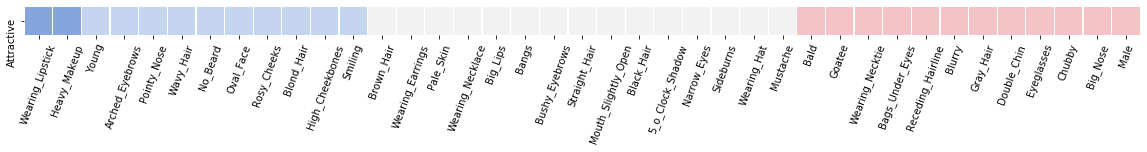

In [84]:
plt.figure(figsize=(20, 10))
sns.heatmap(attcorr.transpose().iloc[:, 1:], vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, cbar=False)
plt.xticks(rotation=70);

Agora temos a correlação comum, bastante distribuída, das variáveis apresentadas. Como anteriormente pudemos analisar o valor absoluto das correlações fica mais fácil agora fazer um recorte.

### Apenas para variáveis de correlação acima de 25%

In [85]:
mask = attabscorr['Attractive'] >= 0.25

In [86]:
attcorr = celeba.corr()[['Attractive']].sort_values(by='Attractive', ascending=False).apply(lambda ratio: round(ratio, 2))
attcorr[mask]

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Attractive
Attractive,1.00
Wearing_Lipstick,0.48
Heavy_Makeup,0.48
Young,0.39
Arched_Eyebrows,0.25
Big_Nose,-0.28
Male,-0.39


In [87]:
att25 = list(attcorr[mask].index)[1:]
att25

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['Wearing_Lipstick',
 'Heavy_Makeup',
 'Young',
 'Arched_Eyebrows',
 'Big_Nose',
 'Male']

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


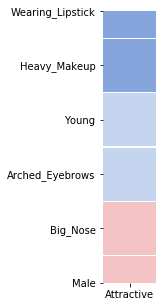

In [91]:
plt.figure(figsize=(5,5))
sns.heatmap(attcorr[mask].iloc[1:, :], vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, cbar=False);

In [89]:
att25.remove('Wearing_Lipstick')
att25.remove('Male')
att25

['Heavy_Makeup', 'Young', 'Arched_Eyebrows', 'Big_Nose']

Aqui é fácil visualizar quais atributos mais impactam na atratividade dos dados:
- Uso de batom
- Uso de maquiagem
- Gênero
- Idade
- Tamanho do nariz
- Arqueamento das sobrancelhas

E, mais do que isso, podemos afirmar qual a tendência de cada uma delas:
- Usar batom
- Usar maquiagem
- Ser mulher
- Ser jovem
- Ter o nariz pequeno
- Ter as sobrancelhas arqueadas

Sabemos no entanto que destes seis atributos, três são altamente correlacionados. Por este motivo não é razoável usar os três simultaneamente para fazer uma análise.
Particularmente a escolha aqui é abandonar batom e gênero. Com isso, podemos gerar uma nova lista de atributos impactantes e independentes:
- Uso de maquiagem
- Idade
- Tamanho do nariz
- Arqueamento das sobrancelhas

### Apenas para variáveis de correlação acima de 37.5%

In [92]:
mask = attabscorr['Attractive'] >= 0.375

In [93]:
attcorr = celeba.corr()[['Attractive']].sort_values(by='Attractive', ascending=False).apply(lambda ratio: round(ratio, 2))
attcorr[mask]

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Attractive
Attractive,1.00
Wearing_Lipstick,0.48
Heavy_Makeup,0.48
Young,0.39
Male,-0.39


In [94]:
att375 = list(attcorr[mask].index)[1:]
att375

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['Wearing_Lipstick', 'Heavy_Makeup', 'Young', 'Male']

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


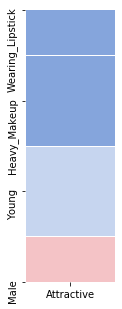

In [95]:
plt.figure(figsize=(5,5))
sns.heatmap(attcorr[mask].iloc[1:, :], vmin=-1, vmax=1, linewidths=0.25, square=True, cmap=palette, cbar=False);

In [96]:
att375.remove('Wearing_Lipstick')
att375.remove('Male')
att375

['Heavy_Makeup', 'Young']

É possível ser mais abrangente do que no caso anterior filtrando de forma menos robusta os atributos. São eles (já eliminando as variáveis altamente correlacionadas):
- Uso de maquiagem
- Idade

# Analisando

## De acordo com a correlação acima de 37.5%

In [97]:
att25

['Heavy_Makeup', 'Young', 'Arched_Eyebrows', 'Big_Nose']

In [98]:
maskA = celeba[att25[0]] == 1
maskB = celeba[att25[1]] == 1
maskC = celeba[att25[2]] == 1
maskD = celeba[att25[3]] == -1
maskall = maskA&maskB&maskC&maskD
maskany = maskA|maskB|maskC|maskD

In [99]:
maskZ = celeba['Attractive'] == 1

In [100]:
len(celeba[maskall])

32208

In [101]:
len(celeba[~maskall])

170391

In [102]:
len(celeba[maskall&maskZ])

28043

In [103]:
len(celeba[maskall&~maskZ])

4165

In [104]:
len(celeba[~maskall&maskZ])

75790

In [105]:
len(celeba[~maskall&~maskZ])

94601

In [106]:
len(celeba[maskany])

184448

In [107]:
len(celeba[maskany&maskZ])

102936

In [108]:
len(celeba[maskany&~maskZ])

81512

In [109]:
celeba[maskall].to_csv('celeba-corr-above-375-all.csv')
celeba[maskall&maskZ].to_csv('celeba-corr-above-375-all-attractive.csv')
celeba[maskall&~maskZ].to_csv('celeba-corr-above-375-all-noatractive.csv')
celeba[~maskall].to_csv('celeba-corr-above-375-none.csv')
celeba[~maskall&maskZ].to_csv('celeba-corr-above-375-none-attractive.csv')
celeba[~maskall&~maskZ].to_csv('celeba-corr-above-375-none-noattractive.csv')
celeba[maskany].to_csv('celeba-corr-above-375-leastone.csv')
celeba[maskany&maskZ].to_csv('celeba-corr-above-375-leastone-attractive.csv')
celeba[maskany&~maskZ].to_csv('celeba-corr-above-375-leastone-noattractive.csv')

Existem em nosso dataset 32.208 pessoas (grupo A1) que têm todos os atributos avaliados e 170.391 que não têm nenhuma (grupo B1).

No grupo A1, temos:
- 28.043 pessoas consideradas atrativas
- 4.165 pessoas consideradas não atrativas

No grupo B1, temos:
- 75.790 pessoas consideradas atrativas
- 94.601 pessoas consideradas não atrativas


Também podemos fazer a análise das 184.448 pessoas (grupo C1) que tenham pelo menos uma das características.
- 102.936 pessoas consideradas atrativas
- 81.512 pessoas consideradas não atrativas

## De acordo com a correlação acima de 25%

In [110]:
att375

['Heavy_Makeup', 'Young']

In [111]:
maskA = celeba[att25[0]] == 1
maskB = celeba[att25[1]] == 1
maskall = maskA&maskB
maskany = maskA|maskB

In [112]:
maskZ = celeba['Attractive'] == 1

In [113]:
len(celeba[maskall])

70699

In [114]:
len(celeba[~maskall])

131900

In [115]:
len(celeba[maskall&maskZ])

60013

In [116]:
len(celeba[maskall&~maskZ])

10686

In [117]:
len(celeba[~maskall&maskZ])

43820

In [118]:
len(celeba[~maskall&~maskZ])

88080

In [119]:
len(celeba[maskany])

164425

In [120]:
len(celeba[maskany&maskZ])

100452

In [121]:
len(celeba[maskany&~maskZ])

63973

In [122]:
celeba[maskall].to_csv('celeba-corr-above-25-all.csv')
celeba[maskall&maskZ].to_csv('celeba-corr-above-25-all-attractive.csv')
celeba[maskall&~maskZ].to_csv('celeba-corr-above-25-all-noatractive.csv')
celeba[~maskall].to_csv('celeba-corr-above-25-none.csv')
celeba[~maskall&maskZ].to_csv('celeba-corr-above-25-none-attractive.csv')
celeba[~maskall&~maskZ].to_csv('celeba-corr-above-25-none-noattractive.csv')
celeba[maskany].to_csv('celeba-corr-above-25-leastone.csv')
celeba[maskany&maskZ].to_csv('celeba-corr-above-25-leastone-attractive.csv')
celeba[maskany&~maskZ].to_csv('celeba-corr-above-25-leastone-noattractive.csv')

No caso mais abrangente, os resultados observados mudam.
Agora são 70.699 pessoas (grupo A2) que têm todos os atributos avaliados e 131.900 que não têm nenhuma (grupo B2).

No grupo A2, temos:
- 60.013 pessoas consideradas atrativas
- 10.686 pessoas consideradas não atrativas

No grupo B2, temos:
- 43.820 pessoas consideradas atrativas
- 88.080 pessoas consideradas não atrativas


Novamente podemos fazer a análise das 164.425 pessoas (grupo C2) que tenham pelo menos uma das características.
- 100.452 pessoas consideradas atrativas
- 63.973 pessoas consideradas não atrativas

## Conclusões

Para os grupos A1 e A2 percebemos que:
- A1 < A2
- aproximadamente 87% dos indivíduos em A1 são atrativos
- aproximadamente 85% dos indivíduos em A2 são atrativos

Para os grupos B1 e B2 percebemos que:
- B1 > B2
- aproximadamente 56% dos indivíduos em B1 não são atrativos
- aproximadamente 67% dos indivíduos em B2 não são atrativos

O tamanho dos grupos é logicamente compreensível: um maior número de filtros amarrados reduz o tamanho do grupo inclusivo e reduz o tamanho do grupo exclusivo.
Para a análise de atratividade em cada grupo, no entanto, a dedução não é tão direta.

A quantidade de indivíduos atrativos em A1 é muito próxima da quantidade de indivíduos atrativos em A2.
- Hipótese: a interseção de A1 e A2 é grande

A quantidade de indivíduos não atrativos em B1 é menor que a quantidade de indivíduos não atrativos em B2.
- Hipótese: existe mais interseção entre Grupos A e B1 do que entre Grupos A e B2

Para os grupos C1 e C2 percebemos que:
- C1 > C2
- aproximadamente 56% dos indivíduos em C1 são atrativos
- aproximadamente 61% dos indivíduos em C2 são atrativos

Uma primeira análise é:
- C1 > C2 > A2 > A1
- Grupos C > Grupos A

Como os filtros para os grupos C não estão amarrados, é mais fácil capturar indivíduos para eles. O grupo C1, por ter mais filtros independentes, consegue capturar um maior número de pessoas.

Isso também explica a flutuação (ainda que baixa, cerca de 5%) de indivíduos atrativos em cada grupo. Como C1 tem uma população maior, a pluralidade é maior que em C2. A mesma lógica pode ser usada em cascata pra A1 e A2.

# Outlier

É possível encontrar um indivíduo que tenha todas as características contrárias ao esperado da maioria dos indivíduos atrativos e e que ainda assim seja atrativo?

Qual o corte de atributos que permite encontrar um indivíduo atrativo?

In [123]:
attcorrinv = celeba.corr()[['Attractive']]
attcorrinv.loc['Attractive'] = -1

In [124]:
#criando uma cópia do dataset original para deletar colunas conforme a busca for rodando
#criando uma série com todas as correlações de atratividade opostas
celebaout = celeba.copy()
attcorrinvout = attcorrinv.copy().apply(lambda corr: -1*corr/abs(corr)).astype('int64').T

## Início da Busca

In [125]:
attcorrinvout

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Attractive,1,-1,1,1,1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,1,-1


In [126]:
celebaout

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


Para cado passo ocorre uma checagem de se existe um ou mais indivíduos atrativos e, caso contrário, os atributos de correlação mais baixa saem da busca.

In [ ]:
#era possível usar o método '.equals()' mas ele exigia que o índice também fosse igual
#por esse motivo achei mais intuitivo separar o índice dos dados para cada indivíduo e fazer comparação por linha

def get_outliers():
    outliers = []

    for index, row in attcorrinvout.iterrows():
        for cindex, crow in celebaout.iterrows():
            if False not in list(row == crow):
                outliers.append(cindex)
    return len(outliers)

In [ ]:
#adandono de correlações
def corr_drop(percent_value):
    for item in attcorrinv[abs(attcorrinv['Attractive']) < percent_value].index:
        try:
            celebaout.drop(item, axis=1, inplace=True)
            attcorrinvout.drop(item, axis=1, inplace=True)
            print(item)
        except:
            print(item)

In [127]:
get_outliers()

0

In [128]:
#abandonando correlações menores que 5%
corr_drop(0.05)

Black_Hair
Bushy_Eyebrows
Mouth_Slightly_Open
Straight_Hair


In [129]:
attcorrinvout

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Blond_Hair,Blurry,...,Rosy_Cheeks,Sideburns,Smiling,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Attractive,1,-1,1,1,1,-1,-1,1,-1,1,...,-1,1,-1,-1,-1,1,-1,-1,1,-1


In [130]:
get_outliers()

0

In [131]:
#abandonando correlações menores que 10%
corr_drop(0.1)

5_o_Clock_Shadow
Bangs
Big_Lips
Black_Hair
Bushy_Eyebrows
Mouth_Slightly_Open
Narrow_Eyes
Pale_Skin
Straight_Hair
Wearing_Necklace


In [132]:
attcorrinvout

,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Big_Nose,Blond_Hair,Blurry,Brown_Hair,Chubby,Double_Chin,...,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necktie,Young
Attractive,-1,1,1,1,1,-1,1,-1,1,1,...,1,-1,1,-1,-1,-1,1,-1,1,-1


In [133]:
get_outliers()

0

In [134]:
#abandonando correlações menores que 15%
corr_drop(0.15)

5_o_Clock_Shadow
Bald
Bangs
Big_Lips
Black_Hair
Brown_Hair
Bushy_Eyebrows
Goatee
High_Cheekbones
Mouth_Slightly_Open
Mustache
Narrow_Eyes
Pale_Skin
Sideburns
Smiling
Straight_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Necklace


In [135]:
attcorrinvout

,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Big_Nose,Blond_Hair,Blurry,Chubby,Double_Chin,Eyeglasses,Gray_Hair,...,Male,No_Beard,Oval_Face,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Wavy_Hair,Wearing_Lipstick,Wearing_Necktie,Young
Attractive,-1,1,1,1,-1,1,1,1,1,1,...,1,-1,-1,-1,1,-1,-1,-1,1,-1


In [136]:
get_outliers()

0

In [137]:
#abandonando correlações menores que 20%
corr_drop(0.2)

5_o_Clock_Shadow
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Goatee
High_Cheekbones
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Necklace
Wearing_Necktie


In [138]:
attcorrinvout

,Arched_Eyebrows,Attractive,Big_Nose,Chubby,Double_Chin,Eyeglasses,Gray_Hair,Heavy_Makeup,Male,Pointy_Nose,Wavy_Hair,Wearing_Lipstick,Young
Attractive,-1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1


In [139]:
get_outliers()

0

Sobraram poucos atributos então os intervalos de abandono serão menores agora.

In [140]:
#abandonando correlações menores que 21%
corr_drop(0.21)

5_o_Clock_Shadow
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Double_Chin
Goatee
Gray_Hair
High_Cheekbones
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Necklace
Wearing_Necktie


In [141]:
attcorrinvout

,Arched_Eyebrows,Attractive,Big_Nose,Chubby,Eyeglasses,Heavy_Makeup,Male,Pointy_Nose,Wavy_Hair,Wearing_Lipstick,Young
Attractive,-1,1,1,1,1,-1,1,-1,-1,-1,-1


In [142]:
get_outliers()

1

In [143]:
outliers

['070556']

In [146]:
celeba.loc['070556'].to_frame().T

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
070556,1,-1,1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [147]:
celeba.loc['070556'].to_frame().T.to_csv('celeba-theoutlier.csv')

Foi possível encontrar uma única resposta cujas 11 características principais para um indivíduo ser considerado atrativo fossem opostas ao padrão do dataset.
- Sobrancelhas não arqueadas
- Nariz grande
- Rosto cheio
- Usa óculos
- Sem maquiagem pesada
- Homem
- Nariz não pontudo
- Cabelo não ondulado
- Não usa batom
- Não é jovem

In [789]:
#end
#fica aqui registrado que rodei 789 linhas na primeira iteração do código